# Lectura de datos e import de librerías

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
plt.style.use('classic')
sns.set_theme(style="whitegrid")
paletteE =['#00377e', '#006B8F', '#06889B', '#FEAE6C', '#FE6C31', '#F93414']
paletteT =['#011F51', '#06889B',  '#FE6C31']

sns.set_palette(palette=paletteE)
X = [ 0.6, 1,     1.4]
Ystick = [ 0.0123 ,0.069, 0.148]
Yad = [ 0.224,  0.05,  0.01 ]

In [8]:

def ref_leer_componentes(atomo):
    '''     
    atomo : Linea de texto proveniente de un archivo refstructureFF.out de donde se extraen las componentes cartesinas a una lista [x,y,z].
    '''
    return  [float(atomo.split()[0]), float(atomo.split()[1]), float(atomo.split()[2])]


def read_trajs(path : str) -> dict:
    '''
    Esta funcion lee la direccion con las salidas de la dinamica molecular (concatenada) y las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = ['traj_stick.out', 'traj_stickearly.out', 'traj_sticklate.out']
    for stick in sticks:    
        if os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick, delim_whitespace=True, header=None))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['stick'].columns = ['ncoup', 'nt', 't', 'nreb', 'nsubh', 'ptad', 'V']
    df['stick'] = df['stick'].sort_values(by='ncoup')
    df['stick'].columns = ['ncoup', 'nt', 't', 'nreb', 'nsubh', 'ptad', 'V']

    df['admol'] = pd.read_csv(path + 'traj_admol.out', delim_whitespace=True, header=None)
    df['admol'].columns = ['ncoup','nt','t','rmax','V','vint']
    df['refl'] = pd.read_csv(path + 'traj_refl.out', delim_whitespace=True, header=None)
    df['refl'].columns = ['ncoup','nt','t','nreb','V','tlf'] 
    return df

def read_CMs(path : str) -> dict:
    '''
    Esta funcion lee la direccion con las salidas de la dinamica molecular (concatenada) y las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = ['traj_stick.out', 'traj_stickearly.out', 'traj_sticklate.out']
    for stick in sticks:    
        if os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['admol'] = pd.read_csv(path + 'traj_admol.out')
    df['refl'] = pd.read_csv(path + 'traj_refl.out')

    return df

Pt_ref = {}
with open('data/refstructureFF.out') as f:
            ref = f.readlines()


for i in range(3,54):
    Pt_ref[str(i-2)] =  ref_leer_componentes(ref[i])    

In [12]:
path0 = 'data/0/1-concat/'
pathRS = 'data/RS/1-concat/' 
energias =  ['Ei0.6_outputs/', 'Ei1.0_outputs/', 'Ei1.4_outputs/']

conf_files = ['config_admol.xyz',
'config_refl.xyz',
'config_stick.xyz',
'config_stickearly.xyz',
'config_sticklate.xyz']


energias =  ['Ei0.6_outputs/','Ei1.0_outputs/','Ei1.4_outputs/']
trajs0 = {}
trajsRS = {}
for Ei in energias:
    trajs0[str(Ei[2:5])] = read_trajs(path0+Ei)
    trajsRS[str(Ei[2:5])] = read_trajs(pathRS+Ei)
E_incidencia = [ '0.6', '1.0', '1.4']

E_incidencia2 = ['0_6','1_0','1_4']
tipo_traj = ['stick', 'admol', 'refl']


In [13]:
def read_CMs(path : str, file : str) -> dict:
    '''
    Esta funcion lee la direccion con ... las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = [f'{file}_stick_CH4_cm.out', f'{file}_stickearly_CH4_cm.out', f'{file}_sticklate_CH4_cm.out']
    for stick in sticks:
        if not os.path.exists(path + stick):
            print(f"El archivo '{stick}' no existe en la ubicación '{path}'")
            pass    
        elif os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['admol'] = pd.read_csv(path + f'{file}_admol_CH4_cm.out')
    df['refl'] = pd.read_csv(path + f'{file}_refl_CH4_cm.out')

    return df

def read_dPt(path : str, file : str) -> dict:
    '''
    Esta funcion lee la direccion con ... las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = [f'{file}_stick_dPt.out', f'{file}_stickearly_dPt.out', f'{file}_sticklate_dPt.out']
    for stick in sticks:
        if not os.path.exists(path + stick):
            print(f"El archivo '{stick}' no existe en la ubicación '{path}'")
            pass    
        elif os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['admol'] = pd.read_csv(path + f'{file}_admol_dPt.out')
    df['refl'] = pd.read_csv(path + f'{file}_refl_dPt.out')

    return df

In [19]:
CMs0 = {}
CMsRS = {}


for Ei,E_path in zip(E_incidencia2, energias):
    file = '0_'+ Ei
    CMs0[Ei] = read_CMs(path0+E_path,file)

for Ei,E_path in zip(E_incidencia2, energias):
    file = 'RS_'+ Ei
    CMsRS[Ei] = read_CMs(pathRS+E_path,file)

El archivo '0_0_6_stickearly_CH4_cm.out' no existe en la ubicación 'data/0/1-concat/Ei0.6_outputs/'
El archivo '0_1_0_stickearly_CH4_cm.out' no existe en la ubicación 'data/0/1-concat/Ei1.0_outputs/'
El archivo '0_1_4_stickearly_CH4_cm.out' no existe en la ubicación 'data/0/1-concat/Ei1.4_outputs/'
El archivo 'RS_0_6_stickearly_CH4_cm.out' no existe en la ubicación 'data/RS/1-concat/Ei0.6_outputs/'
El archivo 'RS_1_0_stickearly_CH4_cm.out' no existe en la ubicación 'data/RS/1-concat/Ei1.0_outputs/'


El archivo 'RS_1_4_stickearly_CH4_cm.out' no existe en la ubicación 'data/RS/1-concat/Ei1.4_outputs/'


In [20]:
# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('CMs0', 0),('CMsRS', 'RS')]:
    # Obtiene el diccionario correspondiente
    cm_dict = globals()[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values = []

    # Itera por las claves del primer nivel ('0_4', '0_6', '0_8', '1_0', '1_2', '1_4')
    for ei_key in ['0_6', '1_0', '1_4']:
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick', 'admol', 'refl')
        for kind_key in ['stick', 'admol', 'refl']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind', y 'T'
            data = cm_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
CMs = pd.concat(data_frames, ignore_index=True)
CMs = CMs.assign(
    dx = CMs.x - CMs.x_ini,
    dy = CMs.y - CMs.y_ini,
    dz = CMs.z - CMs.z_ini
)
CMs['Ei'] = CMs.Ei.replace('_','.', regex=True)
CMs=CMs.sort_values(by=['T','Ei','ntraj'])


In [24]:
dPt0 = {}
dPtRS = {}


for Ei,E_path in zip(E_incidencia2, energias):
    file = '0_'+ Ei
    dPt0[Ei] = read_dPt(path0+E_path,file)

for Ei,E_path in zip(E_incidencia2, energias):
    file = 'RS_'+ Ei
    dPtRS[Ei] = read_dPt(pathRS+E_path,file)

El archivo '0_0_6_stickearly_dPt.out' no existe en la ubicación 'data/0/1-concat/Ei0.6_outputs/'
El archivo '0_1_0_stickearly_dPt.out' no existe en la ubicación 'data/0/1-concat/Ei1.0_outputs/'
El archivo '0_1_4_stickearly_dPt.out' no existe en la ubicación 'data/0/1-concat/Ei1.4_outputs/'
El archivo 'RS_0_6_stickearly_dPt.out' no existe en la ubicación 'data/RS/1-concat/Ei0.6_outputs/'
El archivo 'RS_1_0_stickearly_dPt.out' no existe en la ubicación 'data/RS/1-concat/Ei1.0_outputs/'
El archivo 'RS_1_4_stickearly_dPt.out' no existe en la ubicación 'data/RS/1-concat/Ei1.4_outputs/'


In [26]:
# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('dPt0', 0), ('dPtRS', 'RS')]:
    # Obtiene el diccionario correspondiente
    pt_dict = globals()[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values = []

    # Itera por las claves del primer nivel ('0_4', '0_6', '0_8', '1_0', '1_2', '1_4')
    # for ei_key in ['0_4', '0_6', '0_8', '1_0', '1_2', '1_4']:
    for ei_key in [ '0_6',  '1_0',  '1_4']:
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick', 'admol', 'refl')
        for kind_key in ['stick', 'admol', 'refl']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind', y 'T'
            data = pt_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
dPt = pd.concat(data_frames, ignore_index=True)

dPt['Ei'] = dPt.Ei.replace('_', '.', regex=True)



In [27]:
# Supongamos que tienes los diccionarios 'trajs50', 'trajs300' y 'trajs550'
trajs_dicts = {'trajs0': trajs0, 'trajsRS': trajsRS}

# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('trajs0', 0), ('trajsRS', 'RS')]:
    # Obtiene el diccionario correspondiente
    trajs_dict = trajs_dicts[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values_trajs = []

    # Itera por las claves del primer nivel ('0.4', '0.6', '0.8', '1.0', '1.2', '1.4')
    for ei_key, ei_data in trajs_dict.items():
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick')
        for kind_key in ['stick']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind' y 'T'
            data = trajs_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values_trajs.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values_trajs, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
trajs_all_stick = pd.concat(data_frames, ignore_index=True)

# Ahora tienes un DataFrame 'trajs_all' con las columnas 'Ei', 'kind', 'T' y los datos correspondientes.


In [28]:
# Supongamos que tienes los diccionarios 'trajs50', 'trajs300' y 'trajs550'
trajs_dicts = {'trajs0': trajs0, 'trajsRS': trajsRS}

# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('trajs0', 0), ('trajsRS', 'RS')]:
    # Obtiene el diccionario correspondiente
    trajs_dict = trajs_dicts[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values_trajs = []

    # Itera por las claves del primer nivel ('0.4', '0.6', '0.8', '1.0', '1.2', '1.4')
    for ei_key, ei_data in trajs_dict.items():
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick')
        for kind_key in ['refl']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind' y 'T'
            data = trajs_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values_trajs.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values_trajs, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
trajs_all_refl = pd.concat(data_frames, ignore_index=True)

# Ahora tienes un DataFrame 'trajs_all' con las columnas 'Ei', 'kind', 'T' y los datos correspondientes.


In [29]:
trajs_all_refl

,ncoup,nt,t,nreb,V,tlf,Ei,kind,T
0,2,4164,0.8326,1,0.632008,0.0,0.6,refl,0
1,5,3580,0.7158,1,0.491255,0.0,0.6,refl,0
2,6,2780,0.5558,1,0.741805,0.0,0.6,refl,0
3,13,3528,0.7054,1,0.745857,0.0,0.6,refl,0
4,17,4479,0.8956,1,1.092884,0.0,0.6,refl,0
...,...,...,...,...,...,...,...,...,...
44625,9996,4121,0.8240,1,0.557596,0.0,1.4,refl,RS
44626,9997,2304,0.4606,1,0.791301,0.0,1.4,refl,RS
44627,9998,2450,0.4898,1,0.527418,0.0,1.4,refl,RS
44628,9999,2221,0.4440,1,0.726983,0.0,1.4,refl,RS


# Analisis RS

In [ ]:
nnini_stick = [0.00717249555423829, 0.0488, 0.095]
nn15_stick = [0.0066875, 0.042, 0.139]


Yad = [ 0.224,  0.05,  0.01 ]
nnini_ad = [0.129816241849437,  0.0176,  0.006]
nn15_ad = [0.2913125, 0.0548, 0.01]

# Resultado Final

In [ ]:
RS['1/T'] = 1000/ RS['T']
RS

,T,Ei,nint,nrefl,nstick,nstickearly,nsticklate,nstickpat,nadmol,nprobl,tot,Prefl,Pstick,Padmol,1/T
0,0,0.6,9000,3527,52,0,11,0,5410,0,9000,0.391889,0.007000,0.601111,inf
1,0,1.0,9000,5625,365,0,40,0,2970,0,9000,0.625000,0.045000,0.330000,inf
2,0,1.4,9000,6876,1044,0,93,0,987,0,9000,0.764000,0.126333,0.109667,inf


C:\Users\guill\AppData\Local\Temp\ipykernel_13896\569469756.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=RS, x='1/T', y='Prefl', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
C:\Users\guill\AppData\Local\Temp\ipykernel_13896\569469756.py:7: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.lineplot(data=RS, x='Ei', y='Prefl', hue='T', marker='o', ax=ax[1], palette=paletteT)


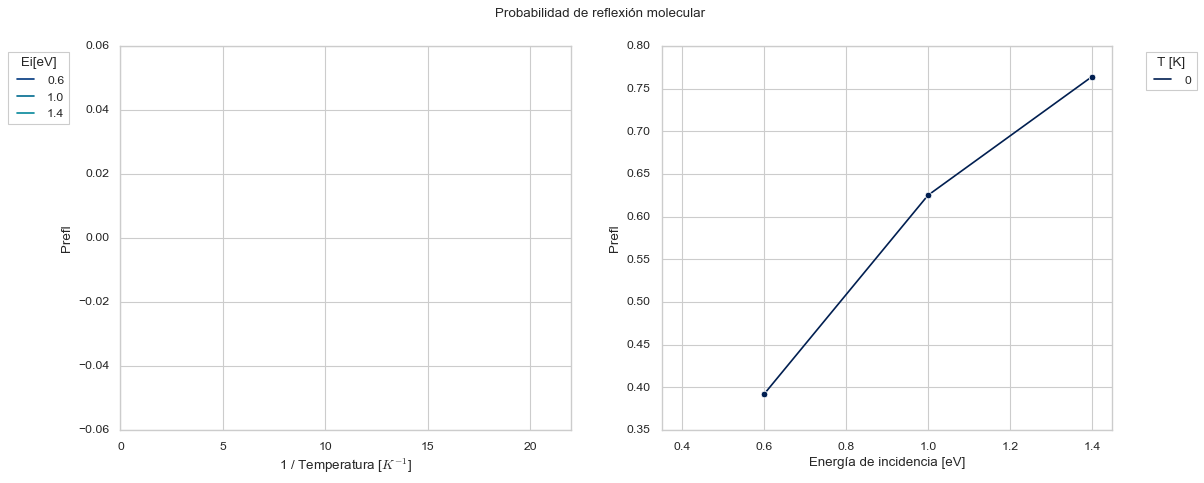

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.lineplot(data=RS, x='1/T', y='Prefl', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
fig.suptitle('Probabilidad de reflexión molecular')
ax[0].legend(bbox_to_anchor=(-0.1,1), title='Ei[eV]')
ax[0].set_xlabel('1 / Temperatura [$K^{-1}$]')
ax[0].set_xlim(0, 22)
sns.lineplot(data=RS, x='Ei', y='Prefl', hue='T', marker='o', ax=ax[1], palette=paletteT)
ax[1].set_xlabel(f'Energía de incidencia [eV]')
ax[1].set_xlim(0.35, 1.45)
ax[1].legend(bbox_to_anchor=(1.2,1), title='T [K]')

C:\Users\guill\AppData\Local\Temp\ipykernel_13896\2985396589.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=RS, x='1/T', y='Pstick', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
C:\Users\guill\AppData\Local\Temp\ipykernel_13896\2985396589.py:7: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.lineplot(data=RS, x='Ei', y='Pstick', hue='T', marker='o', ax=ax[1], palette=paletteT)


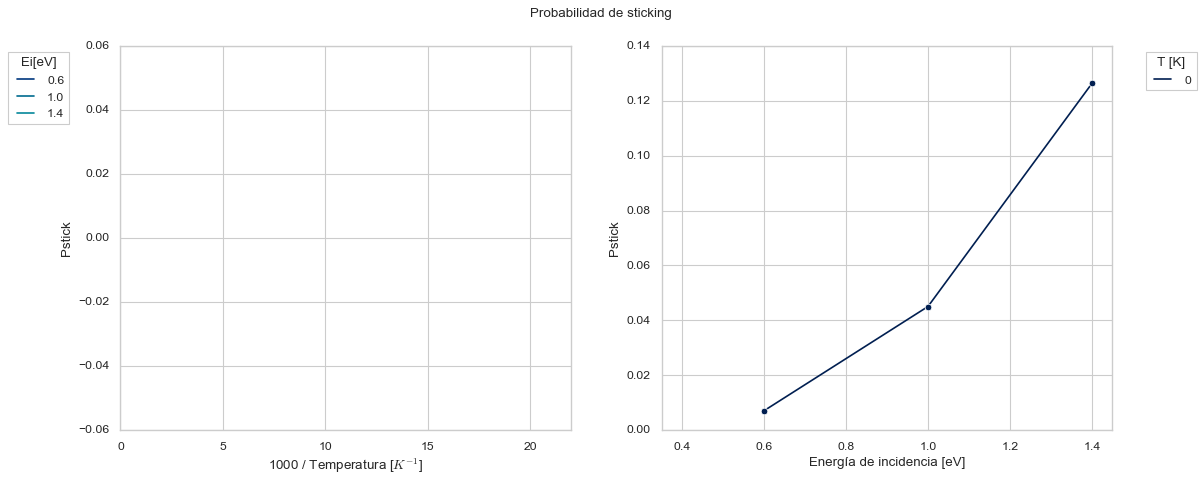

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.lineplot(data=RS, x='1/T', y='Pstick', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
fig.suptitle('Probabilidad de sticking')
ax[0].legend(bbox_to_anchor=(-0.1,1), title='Ei[eV]')
ax[0].set_xlabel('1000 / Temperatura [$K^{-1}$]')
ax[0].set_xlim(0, 22)
sns.lineplot(data=RS, x='Ei', y='Pstick', hue='T', marker='o', ax=ax[1], palette=paletteT)
ax[1].set_xlabel(f'Energía de incidencia [eV]')
ax[1].set_xlim(0.35, 1.45)
ax[1].legend(bbox_to_anchor=(1.2,1), title='T [K]')

C:\Users\guill\AppData\Local\Temp\ipykernel_13896\3988608700.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=RS, x='1/T', y='Pstick', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
C:\Users\guill\AppData\Local\Temp\ipykernel_13896\3988608700.py:10: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.lineplot(data=RS, x='Ei', y='Pstick', hue='T', marker='o', ax=ax[1], palette=paletteT)


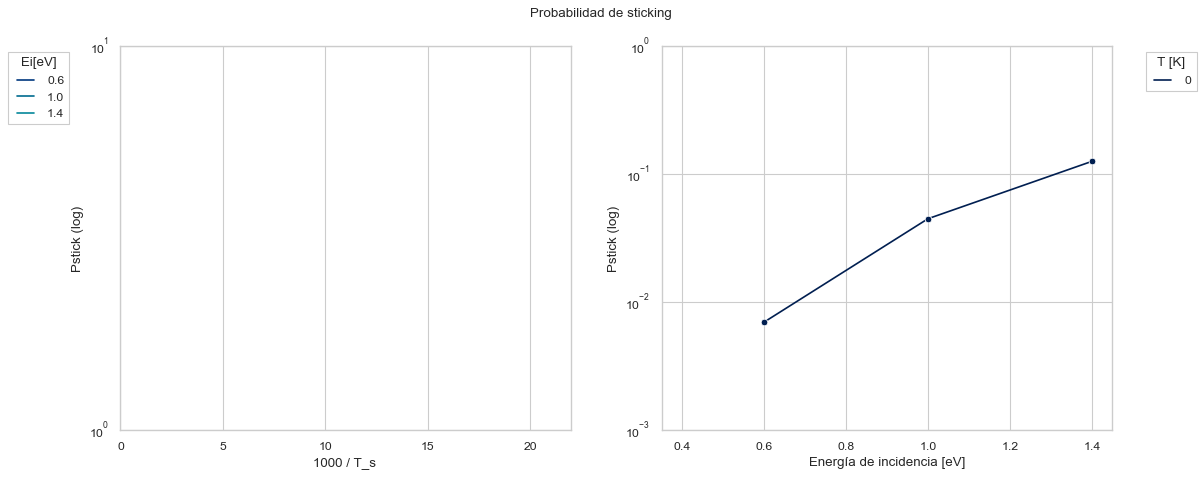

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.lineplot(data=RS, x='1/T', y='Pstick', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
fig.suptitle('Probabilidad de sticking')
ax[0].legend(bbox_to_anchor=(-0.1,1), title='Ei[eV]')

ax[0].set_yscale('log')
ax[0].set_xlabel('1000 / T_s ')
ax[0].set_ylabel(f'Pstick (log)')
ax[0].set_xlim(0, 22)
sns.lineplot(data=RS, x='Ei', y='Pstick', hue='T', marker='o', ax=ax[1], palette=paletteT)
ax[1].set_yscale('log')
ax[1].set_ylabel(f'Pstick (log)')
ax[1].set_xlabel(f'Energía de incidencia [eV]')
ax[1].set_xlim(0.35, 1.45)
ax[1].legend(bbox_to_anchor=(1.2,1), title='T [K]')

C:\Users\guill\AppData\Local\Temp\ipykernel_13896\3722663342.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=RS, x='1/T', y='Padmol', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
C:\Users\guill\AppData\Local\Temp\ipykernel_13896\3722663342.py:7: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.lineplot(data=RS, x='Ei', y='Padmol', hue='T', marker='o', ax=ax[1], palette=paletteT)


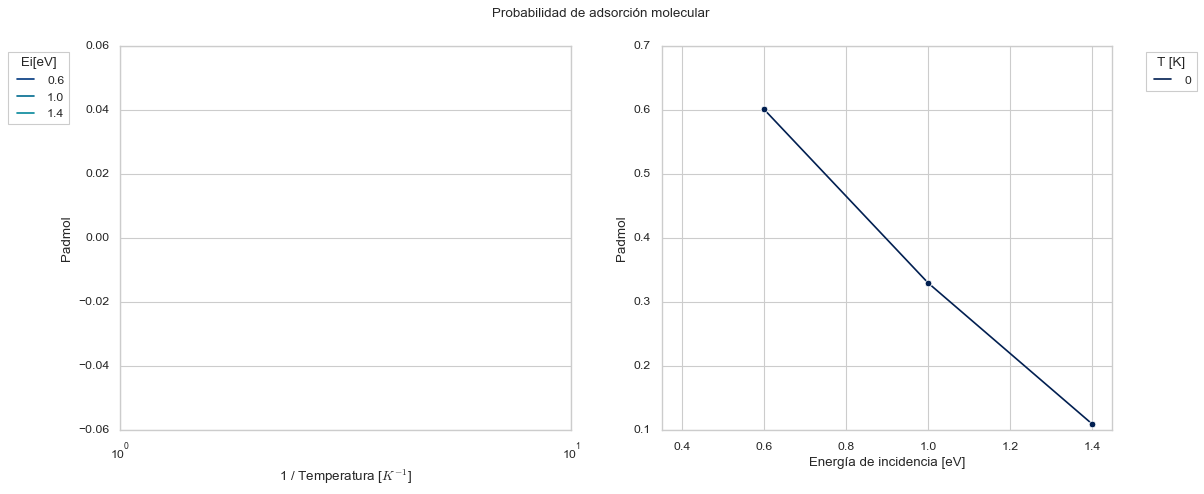

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.lineplot(data=RS, x='1/T', y='Padmol', hue='Ei', marker='o', ax=ax[0], palette=paletteE)
fig.suptitle('Probabilidad de adsorción molecular')
ax[0].legend(bbox_to_anchor=(-0.1,1), title='Ei[eV]')
ax[0].set_xlabel('1 / Temperatura [$K^{-1}$]')
ax[0].set_xscale('log') 
sns.lineplot(data=RS, x='Ei', y='Padmol', hue='T', marker='o', ax=ax[1], palette=paletteT)
ax[1].set_xlabel(f'Energía de incidencia [eV]')
ax[1].set_xlim(0.35, 1.45)
ax[1].legend(bbox_to_anchor=(1.2,1), title='T [K]')

In [ ]:
MD = pd.read_csv('../MD/data/02 - NN15 sheets/MDNN15.csv')
MD = MD.query('Ei>0.4')

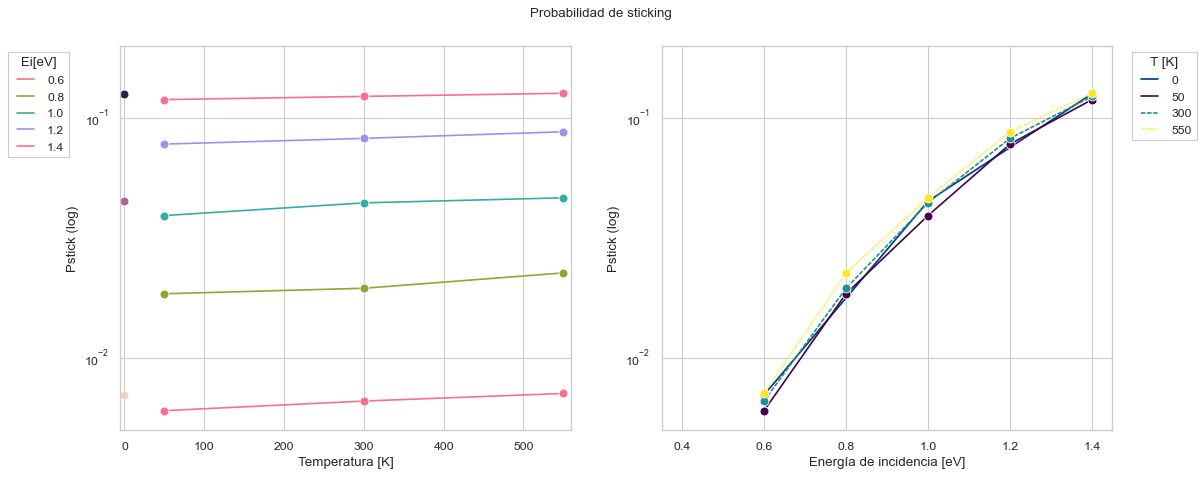

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes la tabla RS cargada en un DataFrame llamado RS

# Crea la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico
sns.lineplot(data=RS, x='T', y='Pstick', hue='Ei', marker='o', style='Ei', dashes=False,
             ax=ax[0], markersize=8, color='black', legend=False)

sns.lineplot(data=MD, x='T', y='Pstick', hue='Ei', marker='o', style='Ei', dashes=False,
             ax=ax[0], palette='husl', markersize=8, hue_order=sorted(MD['Ei'].unique()))
fig.suptitle('Probabilidad de sticking')
ax[0].legend(bbox_to_anchor=(-0.1, 1), title='Ei[eV]')

# Escala logarítmica en el eje y
ax[0].set_yscale('log')
ax[0].set_xlabel(f'Temperatura [K]')
ax[0].set_ylabel(f'Pstick (log)')
ax[0].set_xlim(-5, 560)
ax[0].set_ylim(0.005, 0.2)

# Segundo gráfico
sns.lineplot(data=RS, x='Ei', y='Pstick', hue='T', marker='o', style='T',
             ax=ax[1],  markersize=8, color='black')

sns.lineplot(data=MD, x='Ei', y='Pstick', hue='T', marker='o', style='T',
             ax=ax[1], palette='viridis', markersize=8, hue_order=sorted(MD['T'].unique()))
ax[1].set_yscale('log')
ax[1].set_ylabel(f'Pstick (log)')
ax[1].set_xlabel(f'Energía de incidencia [eV]')
ax[1].set_xlim(0.35, 1.45)
ax[1].set_ylim(0.005, 0.2)
ax[1].legend(bbox_to_anchor=(1.2, 1), title='T [K]')

# Muestra la gráfica
plt.show()
